# Lab-4 Single Layer Perceptron and Multi-Layer Perceptron 
<style>
@page {
    margin: 1in;
    @top-left {
        content: "EICDT24404";
        font-weight: bold;
    }
    @top-right {
        content: "Deep Learning";
        font-weight: bold;
    }
    @bottom-left {
        content: "Lab-4";
    }
    @bottom-right {
        content: "Enrollment Number: 1AUA23BCS155";
    }
}

body {
    font-family: "Georgia", "Times New Roman", serif;
    font-size: 14pt;
}
</style>

Task 1 — Single Layer Perceptron (from scratch) 
Objective: Train a perceptron to classify points based on a linear boundary using Python from 
first principles.

a. Setup Python Environment 

b. Define Perceptron Function 

c. Generate Synthetic Training Data 

d. Train with Perceptron Learning Rule 

e. Visualize Decision Boundary

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [24]:
#Perceptron function for binary classification 
def perceptron(X,y, lr=0.01,it=1000):
    samples,features = X.shape
    weights=np.zeros(features)
    bias=0.0
    errors=[]
    for _ in range(it):
        error = 0
        for idx,x_i in enumerate(X):
            linear_output = np.dot(x_i,weights) + bias
            y_predicted = np.where(linear_output>=0,1,0)
            update = lr * (y[idx] - y_predicted)
            weights += update * x_i
            bias += update
            error += int(update != 0.0)
        errors.append(error)
    return weights,bias,errors

#Generating synthetic data for binary classification
X,y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

#Training the perceptron model
print("Initial Data Points:", X[:5])
print("Initial Labels:", y[:5] , "\n")
weights,bias,errors = perceptron(X,y, lr=0.1, it=20)
print("Weights:", weights)
print("Bias:", bias, "\n")
print("Final Data Points:", X[-5:])
print("Final Labels:", y[-5:])
print("Errors in each iteration:", errors)


    

Initial Data Points: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]]
Initial Labels: [0 1 0 1 1] 

Weights: [ 0.87113019 -0.58016554]
Bias: 0.0 

Final Data Points: [[-1.4781981   9.94556625]
 [-1.59379551  9.34303724]
 [ 3.79308512  0.45832246]
 [-2.72886951  9.3713987 ]
 [-2.50408417  8.77969899]]
Final Labels: [0 0 1 0 0]
Errors in each iteration: [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


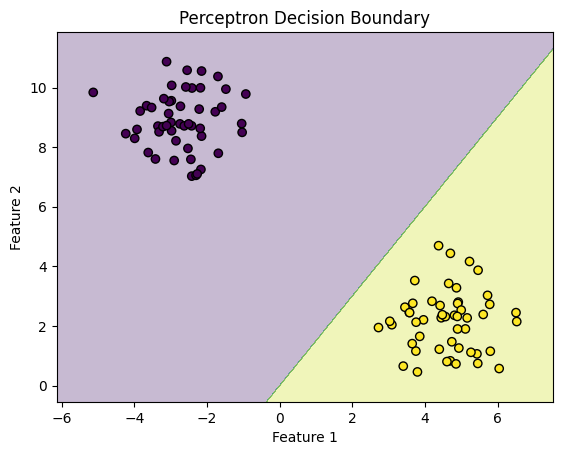

In [25]:
#Plotting the decision boundary
def plot_decision_boundary(X, y, weights, bias):
    x_min,x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min,y_max = X[:,1].min()-1, X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
    Z = np.where(Z>=0,1,0)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()
    
plot_decision_boundary(X, y, weights, bias)

Task 2 — Multi-Layer Perceptron (MLP)
Objective: Build an MLP classifier using NumPy (from scratch) to learn non-linear decision boundaries. 

a. Define Network Architecture 

For simplicity: 

    • Input layer: 2 neurons 

    • Hidden layer: 4 neurons (ReLU activation) 

    • Output layer: 1 neuron (sigmoid)

b. Define Activation Functions 

c. Initialize Weights & Biases 

d. Train with Backpropagation 

e. Evaluate the Model

In [26]:
# Neural architecture for multi-class classification

np.random.seed(42)

#Activation Functions

def relu(X):
    return np.maximum(0,X)

def relu_derivative(X):
    return np.where(X>0,1,0)

def sigmoid(X):
    return 1/(1+np.exp(-X))

def sigmoid_derivative(X):
    sig = sigmoid(X)
    return sig * (1 - sig)

def softmax(X):
    exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
    return exp_X / np.sum(exp_X, axis=1, keepdims=True)

input_size,hidden_size,output_size = 2,4,1

#Parameters 
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

#Non=Linear dataset

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])

#Training the Neural Network
lr = 0.1
epochs = 10000

for epoch in range(epochs):
    
    #Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    #Loss
    loss = -np.mean(y*np.log(A2+1e-8) + (1-y)*np.log(1-A2+1e-8))
    
    #Backpropagation
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / len(X)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / len(X)
    db1 = np.sum(dZ1, axis=0, keepdims=True) /  len(X)
    
    #Update weights and biases
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1
    
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
        

#Predicitons 
Z1 = np.dot(X, W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)

predictions = np.where(A2>=0.5,1,0)

print("Predictions after training:")
print(predictions)

print("True Labels:")
print(y)

Epoch 0, Loss: 0.6931485370687909
Epoch 1000, Loss: 0.49715216129631035
Epoch 2000, Loss: 0.4791112645849659
Epoch 3000, Loss: 0.47823872816386864


Epoch 4000, Loss: 0.47783472564781165
Epoch 5000, Loss: 0.47773026673401414
Epoch 6000, Loss: 0.47765495598735375
Epoch 7000, Loss: 0.4776088605590095
Epoch 8000, Loss: 0.47756779152533524
Epoch 9000, Loss: 0.47753708085773183
Predictions after training:
[[1]
 [1]
 [1]
 [0]]
True Labels:
[[0]
 [1]
 [1]
 [0]]


Task 3 — Perform following tasks: 

1. Compare single layer vs MLP on linearly separable vs non-linear data (eg., XOR).  

2. Explore how hidden layer size impacts learning. 

3. Plot loss over training epochs. 

In [27]:
from sklearn.datasets import make_blobs
import numpy as np

# Linear dataset
X_lin, y_lin = make_blobs(n_samples=200, centers=2, random_state=42)
y_lin = y_lin.reshape(-1,1)

# XOR dataset
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([[0],[1],[1],[0]])

w_lin, b_lin, err_lin = perceptron(X_lin, y_lin.flatten(), lr=0.1, it=20)
w_xor, b_xor, err_xor = perceptron(X_xor, y_xor.flatten(), lr=0.1, it=20)

def perceptron_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.where(linear_output >= 0, 1, 0)

# Perceptron predictions
pred_lin_perc = perceptron_predict(X_lin, w_lin, b_lin)
pred_xor_perc = perceptron_predict(X_xor, w_xor, b_xor)

print("Perceptron - Linear Predictions vs True")
print(np.c_[pred_lin_perc[:10], y_lin[:10]])

print("\nPerceptron - XOR Predictions vs True")
print(np.c_[pred_xor_perc, y_xor])

Perceptron - Linear Predictions vs True
[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]

Perceptron - XOR Predictions vs True
[[1 0]
 [1 1]
 [0 1]
 [0 0]]


In [28]:
# MLP Training and Prediction Functions
def train_mlp(X, y, hidden_size=8, lr=0.05, epochs=20000, print_loss=True):
    np.random.seed(42)
    
    input_size = X.shape[1]
    output_size = 1

    # He initialization
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, output_size))

    losses = []

    for epoch in range(epochs):

        # Forward
        Z1 = np.dot(X, W1) + b1
        A1 = np.tanh(Z1)
        
        Z2 = np.dot(A1, W2) + b2
        A2 = 1 / (1 + np.exp(-Z2))    # Sigmoid

        loss = -np.mean(y*np.log(A2+1e-8) + (1-y)*np.log(1-A2+1e-8))
        losses.append(loss)

        # Backprop
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / len(X)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * (1 - np.tanh(Z1)**2)   # tanh derivative
        dW1 = np.dot(X.T, dZ1) / len(X)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

        # Update
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        if print_loss and epoch % 2000 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, losses

def predict_mlp(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    return np.where(A2 >= 0.5, 1, 0)

# Train MLP on XOR dataset
print("MLP Training on XOR (Non-Linear) Dataset")
W1_xor, b1_xor, W2_xor, b2_xor, losses_xor = train_mlp(X_xor, y_xor, hidden_size=4, epochs=10000)
pred_xor_mlp = predict_mlp(X_xor, W1_xor, b1_xor, W2_xor, b2_xor)

print("\nMLP - XOR Predictions vs True")
print(np.c_[pred_xor_mlp, y_xor])

# Train MLP on Linear dataset
print("MLP Training on Linear Dataset")
W1_lin, b1_lin, W2_lin, b2_lin, losses_lin = train_mlp(X_lin, y_lin, hidden_size=4, epochs=5000)
pred_lin_mlp = predict_mlp(X_lin, W1_lin, b1_lin, W2_lin, b2_lin)

print("\nMLP - Linear Predictions (first 10) vs True")
print(np.c_[pred_lin_mlp[:10], y_lin[:10]])

# Compare Accuracies
from sklearn.metrics import accuracy_score

print("COMPARISON: Perceptron vs MLP")
print(f"\nLinear Dataset (Linearly Separable):")
print(f"  Perceptron Accuracy: {accuracy_score(y_lin.flatten(), pred_lin_perc):.2%}")
print(f"  MLP Accuracy:        {accuracy_score(y_lin.flatten(), pred_lin_mlp.flatten()):.2%}")

print(f"\nXOR Dataset (Non-Linear):")
print(f"  Perceptron Accuracy: {accuracy_score(y_xor.flatten(), pred_xor_perc):.2%}")
print(f"  MLP Accuracy:        {accuracy_score(y_xor.flatten(), pred_xor_mlp.flatten()):.2%}")


MLP Training on XOR (Non-Linear) Dataset
Epoch 0, Loss: 0.7830
Epoch 2000, Loss: 0.0566
Epoch 4000, Loss: 0.0176
Epoch 6000, Loss: 0.0102
Epoch 8000, Loss: 0.0071

MLP - XOR Predictions vs True
[[0 0]
 [1 1]
 [1 1]
 [0 0]]
MLP Training on Linear Dataset
Epoch 0, Loss: 0.9673
Epoch 2000, Loss: 0.0052
Epoch 4000, Loss: 0.0026

MLP - Linear Predictions (first 10) vs True
[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]
COMPARISON: Perceptron vs MLP

Linear Dataset (Linearly Separable):
  Perceptron Accuracy: 100.00%
  MLP Accuracy:        100.00%

XOR Dataset (Non-Linear):
  Perceptron Accuracy: 50.00%
  MLP Accuracy:        100.00%


In [29]:
# Task 3.2: Explore impact of hidden layer size on learning
hidden_sizes = [2, 4, 8, 16]
results = []

for hs in hidden_sizes:
    W1, b1, W2, b2, losses = train_mlp(X_xor, y_xor, hidden_size=hs, epochs=10000, print_loss=False)
    predictions = predict_mlp(X_xor, W1, b1, W2, b2)
    acc = accuracy_score(y_xor.flatten(), predictions.flatten())
    final_loss = losses[-1]
    results.append((hs, acc, final_loss, losses))
    print(f"Hidden Size: {hs:2d} | Accuracy: {acc:.2%} | Final Loss: {final_loss:.4f}")

print("\nConclusion: MLPs with hidden sizes >= 4 can solve XOR problem effectively.")


Hidden Size:  2 | Accuracy: 50.00% | Final Loss: 0.3499
Hidden Size:  4 | Accuracy: 100.00% | Final Loss: 0.0055
Hidden Size:  8 | Accuracy: 100.00% | Final Loss: 0.0041
Hidden Size: 16 | Accuracy: 100.00% | Final Loss: 0.0026

Conclusion: MLPs with hidden sizes >= 4 can solve XOR problem effectively.


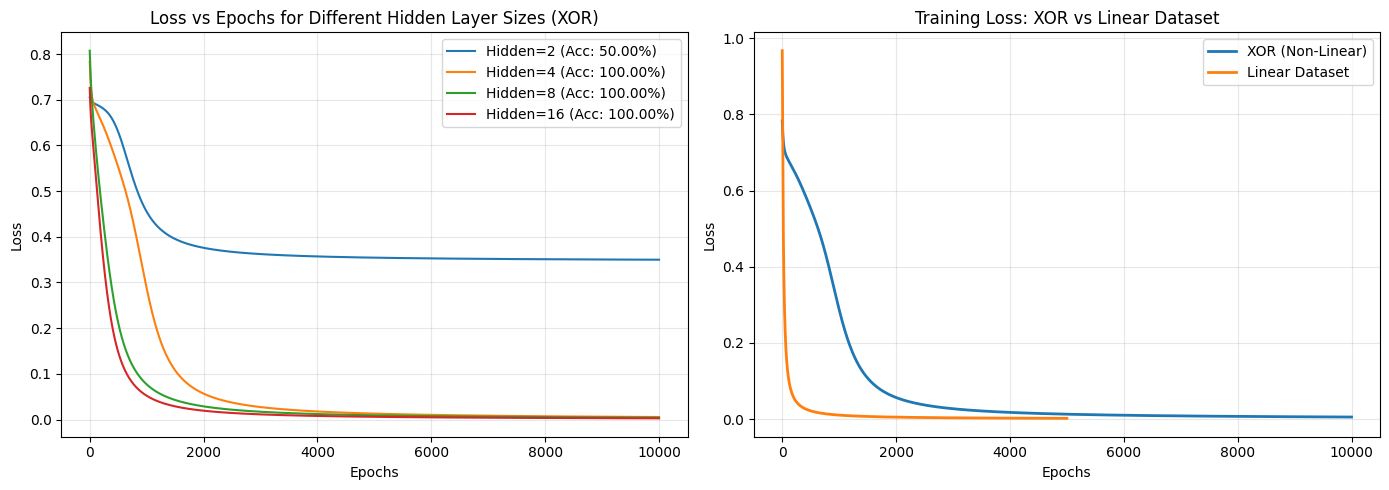


Key Observations:
1. Perceptron works well on linearly separable data but fails on XOR
2. MLP can solve both linear and non-linear problems
3. Hidden layer size >= 4 is sufficient for XOR
4. Linear problems converge faster than non-linear problems


In [30]:
# Task 3.3: Plot loss over training epochs

# Plot loss curves for different hidden layer sizes
plt.figure(figsize=(14, 5))

# Plot 1: Loss for different hidden sizes on XOR
plt.subplot(1, 2, 1)
for hs, acc, final_loss, losses in results:
    plt.plot(losses, label=f'Hidden={hs} (Acc: {acc:.2%})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Hidden Layer Sizes (XOR)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Compare XOR vs Linear dataset loss
plt.subplot(1, 2, 2)
plt.plot(losses_xor, label='XOR (Non-Linear)', linewidth=2)
plt.plot(losses_lin, label='Linear Dataset', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss: XOR vs Linear Dataset')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("1. Perceptron works well on linearly separable data but fails on XOR")
print("2. MLP can solve both linear and non-linear problems")
print("3. Hidden layer size >= 4 is sufficient for XOR")
print("4. Linear problems converge faster than non-linear problems")
